**Objective:**
To Predict SO2 concentration in Dwarka, Delhi region for next few months using ARIMA Model.

**The data has been taken from cpcb website by means of web scraping using selenium and beautifulsoup**

**Code:**
https://github.com/ninjakx/CPCB/blob/master/cpcb.py

**Project Full Code:**
https://github.com/ninjakx/AQP/



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd drive/My Drive

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive/AQP-master - Copy (2)/AQP-master/Machine learning


In [0]:
%cd AQP-master - Copy (2)/AQP-master/Machine learning

[Errno 2] No such file or directory: 'AQP-master - Copy (2)/AQP-master/Machine learning'
/content/drive/My Drive/AQP-master - Copy (2)/AQP-master/Machine learning


In [0]:
import numpy as np
import pandas as pd
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

In [0]:
'''arr = ['index.1', 'Nitrogen Dioxide(NO2).1', 'Bar Pressure(Bar Pressure).1',
       'PM 10(RSPM).1', 'PM 2.5(PM2.5).1', 'Sulfur Dioxide(SO2).1',
       'Temperature(TEMP).1']
for i in range(2010,2017):
    data = pd.read_csv("airdata/dwarka-"+str(i)+".csv",sep=';',encoding = 'windows-1252')
    for col in data.columns:
        #print("col:",col)
        if col in arr:
            print(col)
            del data[col]'''

'arr = [\'index.1\', \'Nitrogen Dioxide(NO2).1\', \'Bar Pressure(Bar Pressure).1\',\n       \'PM 10(RSPM).1\', \'PM 2.5(PM2.5).1\', \'Sulfur Dioxide(SO2).1\',\n       \'Temperature(TEMP).1\']\nfor i in range(2010,2017):\n    data = pd.read_csv("airdata/dwarka-"+str(i)+".csv",sep=\';\',encoding = \'windows-1252\')\n    for col in data.columns:\n        #print("col:",col)\n        if col in arr:\n            print(col)\n            del data[col]'

In [0]:
files = ["airdata/dwarka-"+str(i)+".csv" for i in range(2010,2020)]
dfs = [pd.read_csv(fp, sep=';',encoding = 'windows-1252', decimal=',') for fp in files]
#df = pd.concat(dfs).drop_duplicates().reset_index(drop=True)
#print (df)

In [0]:
dfs[8]['index'] = dfs[8]['Date']  # 2018
del dfs[8]['Date']
dfs[9]['index'] = dfs[9]['Date']  # 2019
del dfs[9]['Date']

In [0]:
import re
def date_extractor(string):
    matches = re.findall('(\d{2,4}[\/\- ]\d{2}[\/\- ]\d{2,4})', string)
    return matches[0]

In [0]:
import dateutil
for df1 in dfs:
    df1['index']=df1['index'].astype(str).apply(lambda x: date_extractor(x))
    df1['index']=df1['index'].astype(str).apply(lambda x: dateutil.parser.parse(x))
df = pd.concat(dfs)

In [0]:
df = df.rename(columns = {'index':'Date','Bar Pressure(Bar Pressure)':'Bar Pressure(BP)'})
df.head()

,Bar Pressure(BP),Nitrogen Dioxide(NO2),PM 10(RSPM),PM 2.5(PM2.5),Solar Radiation(SR),Sulfur Dioxide(SO2),Temperature(TEMP),Date
0,646.09,12.3,124.12,NaN,NaN,5.85,14.61,2010-01-02
1,732.95,27.28,70.62,NaN,NaN,5.05,23.87,2010-01-03
2,735.69,29.57,109.88,NaN,NaN,23.84,31.54,2010-01-04
3,734.58,15.93,61.12,NaN,NaN,6.36,30.12,2010-01-05
4,729.43,45.35,163.67,NaN,NaN,4.42,34.22,2010-01-06


In [0]:
data = df[['Bar Pressure(BP)','Nitrogen Dioxide(NO2)','PM 10(RSPM)','PM 2.5(PM2.5)','Solar Radiation(SR)'\
    ,'Sulfur Dioxide(SO2)','Temperature(TEMP)']].groupby([df.Date.dt.year,df.Date.dt.month]).agg('count').rename_axis(['Year','Month'])

In [0]:
d = pd.DataFrame(data)
d.columns

Index(['Bar Pressure(BP)', 'Nitrogen Dioxide(NO2)', 'PM 10(RSPM)',
       'PM 2.5(PM2.5)', 'Solar Radiation(SR)', 'Sulfur Dioxide(SO2)',
       'Temperature(TEMP)'],
      dtype='object')

In [0]:
d.unstack()

Bar Pressure(BP)                                      ...  \
Month               1   2   3   4   5   6   7   8   9   10  ...   
Year                                                        ...   
2010                30  27  30  29  26  29  31  31  30  31  ...   
2011                31  27  29  28  31  30  31  31  30  31  ...   
2012                30  26  27  25  29  28  30  30  26  21  ...   
2013                31  28  28  30  30  29  30  29  24  28  ...   
2014                31  28  31  29  30  29  29  31  30  30  ...   
2015                31  27  31  30  31  29  29  28  29  31  ...   
2016                 0   0   0   0   0   0   0   0   0   0  ...   
2017                 0   0   0   0   0   0   0   0   0   0  ...   
2018                 0   0   0   0   0   0   0   0   0   0  ...   
2019                 0   0   0   0   0   0   0   0   0   0  ...   

      Temperature(TEMP)                                      
Month                3   4   5   6   7   8   9   10  11  12  
Year                                                         
2010                 29  28  25  28  31  31  30  31  30  31  
2011                 29  28  31  30  31  31  30  31  30  29  
2012                 27  25  29  28  30  30  23  21  19  26  
2013                 28  30  30  29  30  29  24  28  28  29  
2014                 31  29  30  29  29  31  30  30  30  29  
2015                 31  30  31  29  29  28  29  31  29  30  
2016                 29  29  20  23  29  27  25  29  28  25  
2017                 30  29  30  29  30  25  30  31  30  30  
2018                 29  29  30  29  28  30  29  30  27  11  
2019                 21   2   2   1   1   1   1   1   1   2  

[10 rows x 84 columns]

## EDA

In [0]:
bar_pressure = d['Bar Pressure(BP)'].unstack().loc[2012]
bar_pressure

Month
1     30
2     26
3     27
4     25
5     29
6     28
7     30
8     30
9     26
10    21
11    19
12    26
Name: 2012, dtype: int64

[Text(0, 0.5, 'BP values'),
 Text(0.5, 0, 'months'),
 Text(0.5, 1.0, 'Bar Pressure values for 2012')]

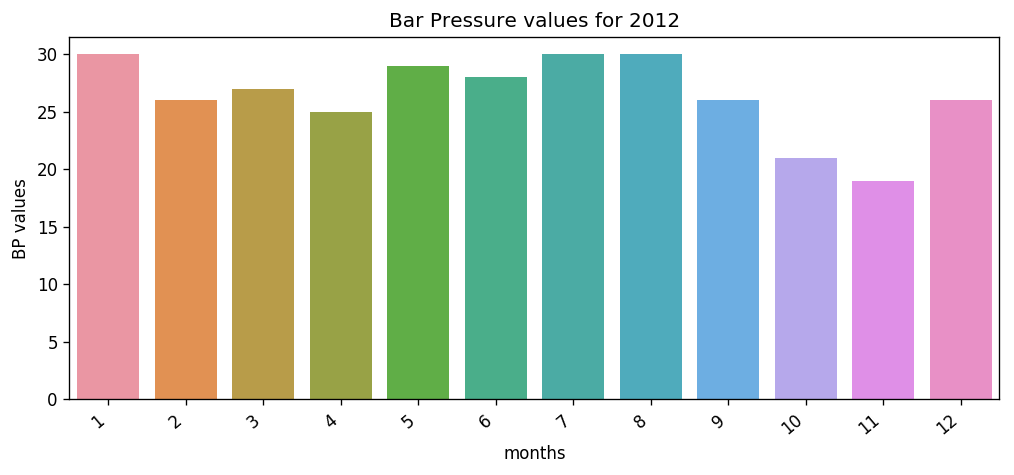

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x = bar_pressure.index, y = bar_pressure.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='months', ylabel='BP values',title='Bar Pressure values for 2012')

[Text(0, 0.5, 'BP values'),
 Text(0.5, 0, 'months'),
 Text(0.5, 1.0, 'Bar Pressure values for each year by month wise')]

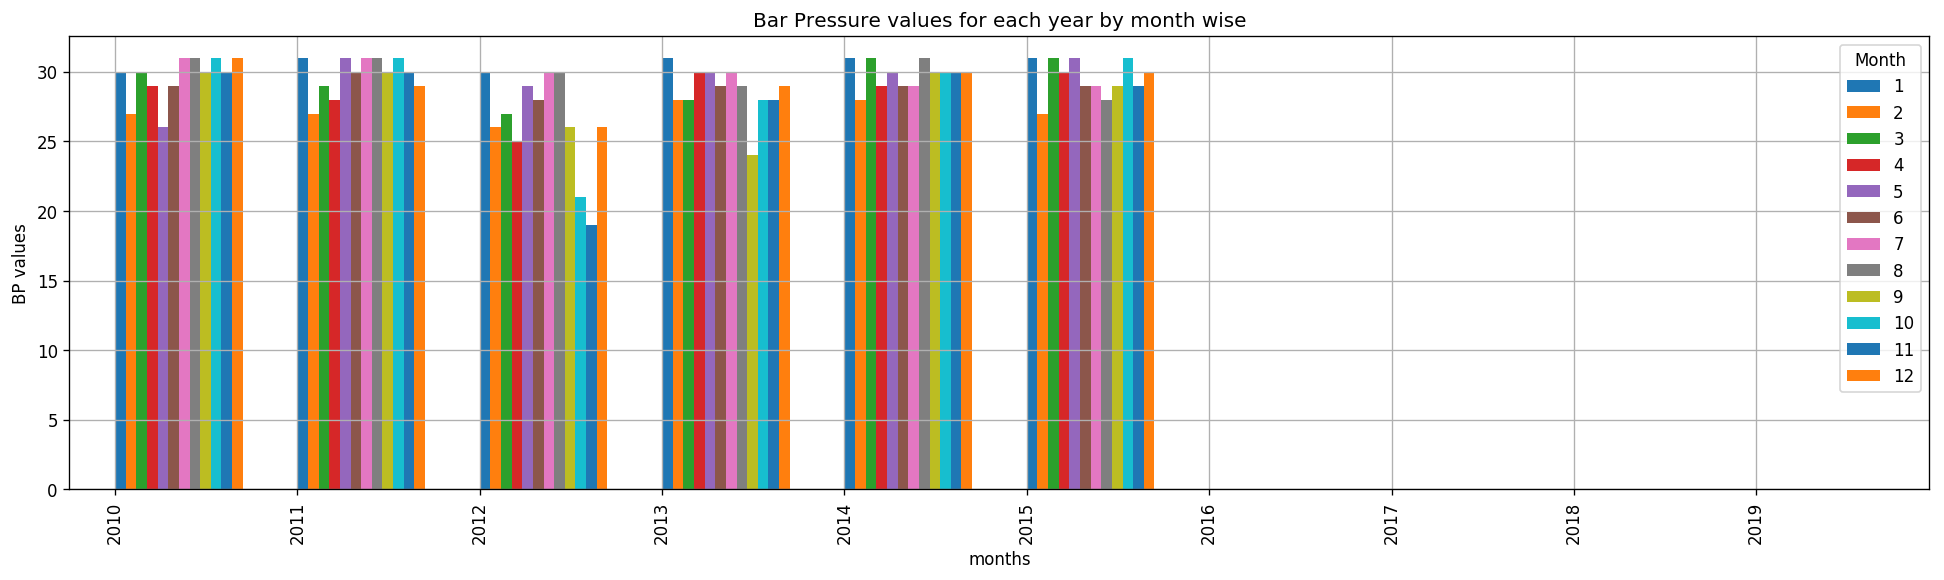

In [0]:
ax=d['Bar Pressure(BP)'].unstack().plot.bar(figsize=(20,5),align='edge', width=0.7)
ax.grid(zorder=0)
ax.set(xlabel='months', ylabel='BP values',title='Bar Pressure values for each year by month wise')
#d.unstack(1).plot.barh()

[Text(0, 0.5, 'NO2 values'),
 Text(0.5, 0, 'months'),
 Text(0.5, 1.0, 'NO2 values for each year by month wise')]

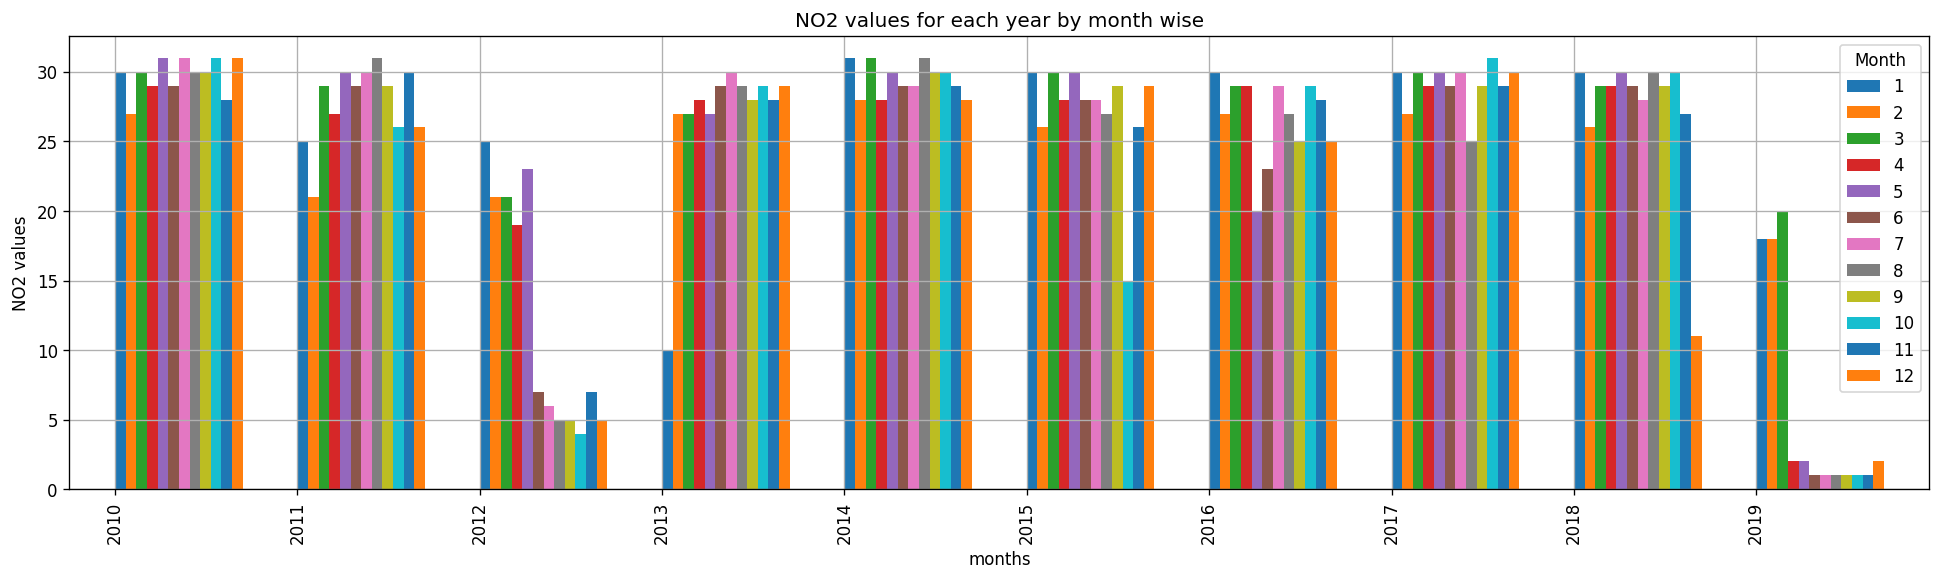

In [0]:
ax=d['Nitrogen Dioxide(NO2)'].unstack().plot.bar(figsize=(20,5),align='edge', width=0.7)
ax.grid(zorder=0)
ax.set(xlabel='months', ylabel='NO2 values',title='NO2 values for each year by month wise')

[Text(0, 0.5, 'PM 10 values'),
 Text(0.5, 0, 'months'),
 Text(0.5, 1.0, 'RSPM values for each year by month wise')]

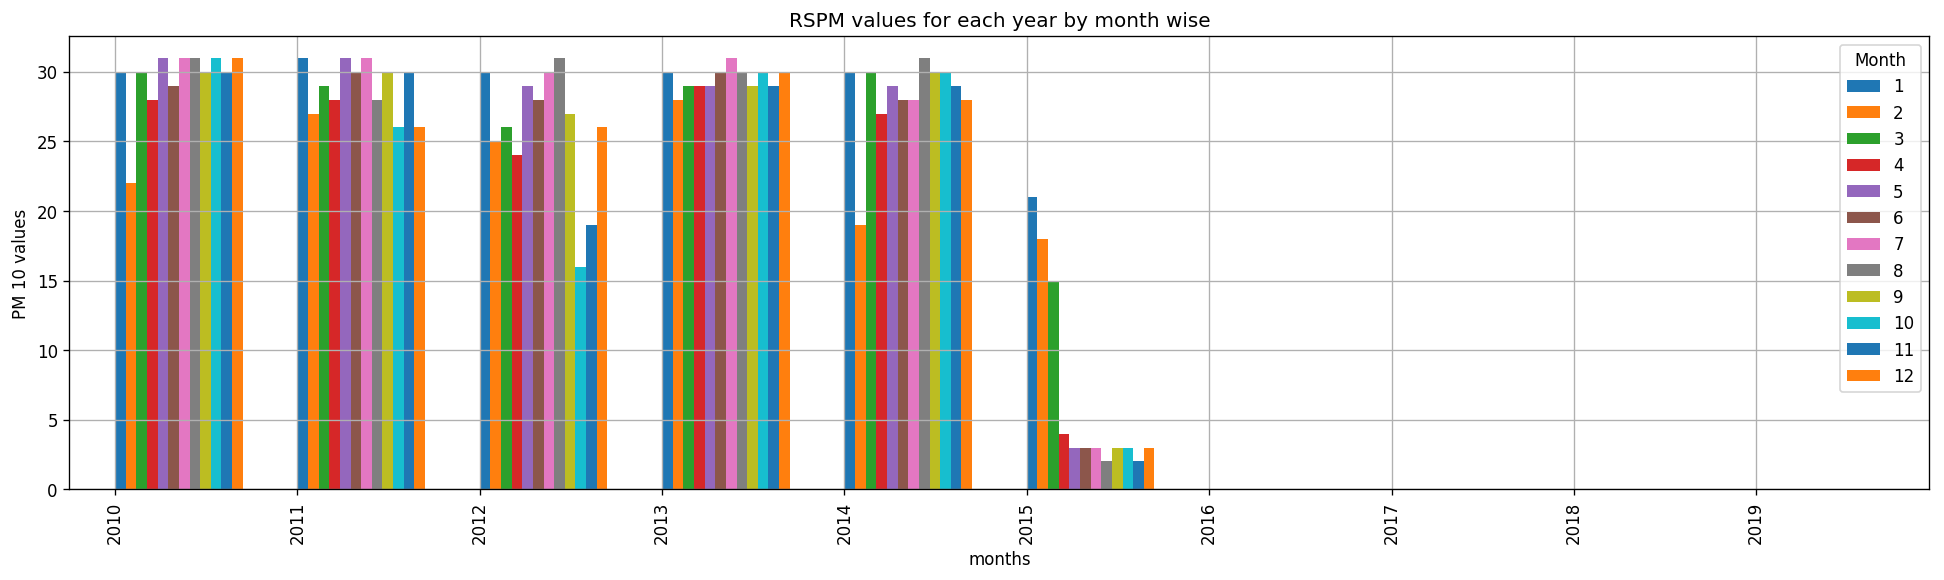

In [0]:
ax=d['PM 10(RSPM)'].unstack().plot.bar(figsize=(20,5),align='edge', width=0.7)
ax.grid(zorder=0)
ax.set(xlabel='months', ylabel='PM 10 values',title='RSPM values for each year by month wise')

[Text(0, 0.5, 'PM 2.5 values'),
 Text(0.5, 0, 'months'),
 Text(0.5, 1.0, 'PM 2.5 values for each year by month wise')]

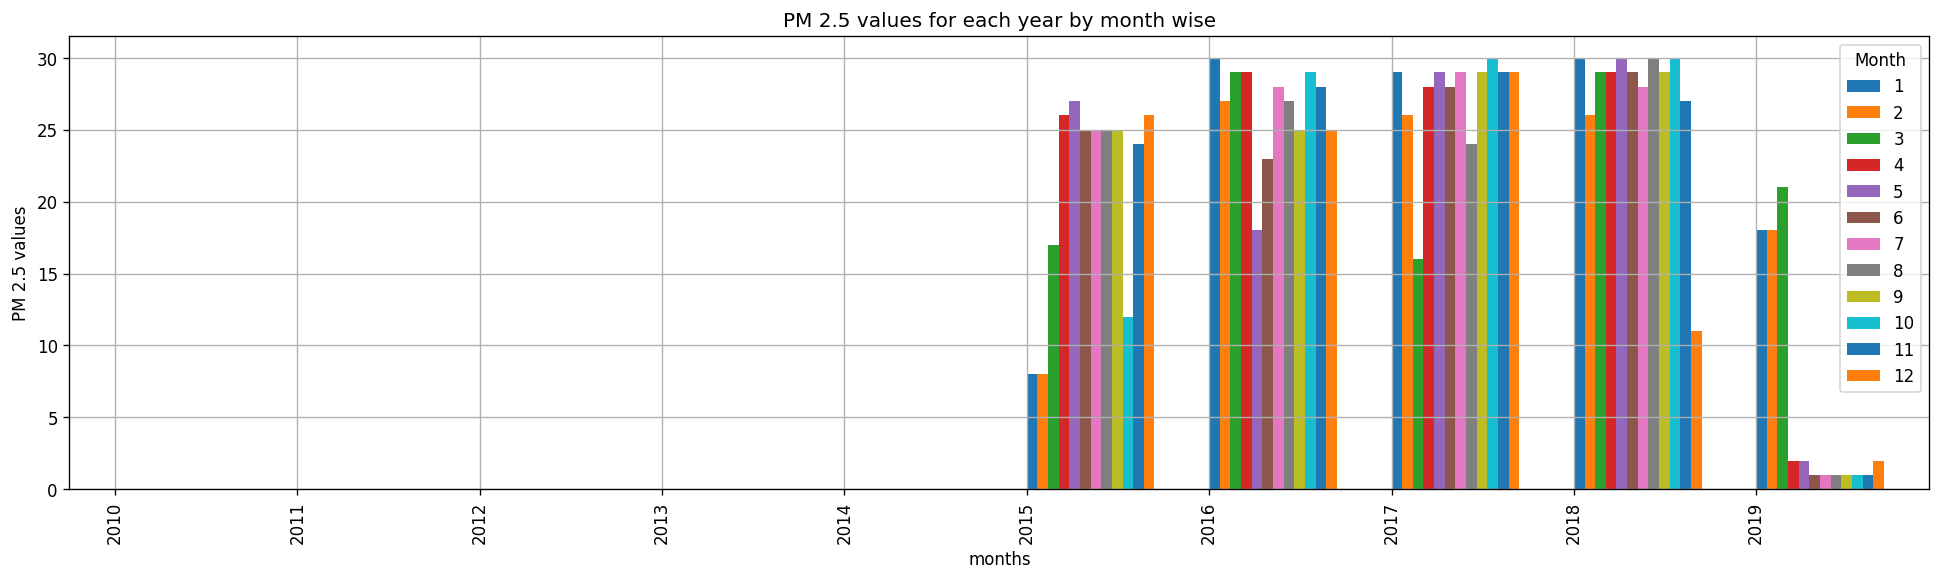

In [0]:
ax=d['PM 2.5(PM2.5)'].unstack().plot.bar(figsize=(20,5),align='edge', width=0.7)
ax.grid(zorder=0)
ax.set(xlabel='months', ylabel='PM 2.5 values',title='PM 2.5 values for each year by month wise')

[Text(0, 0.5, 'SR values'),
 Text(0.5, 0, 'months'),
 Text(0.5, 1.0, 'SR values for each year by month wise')]

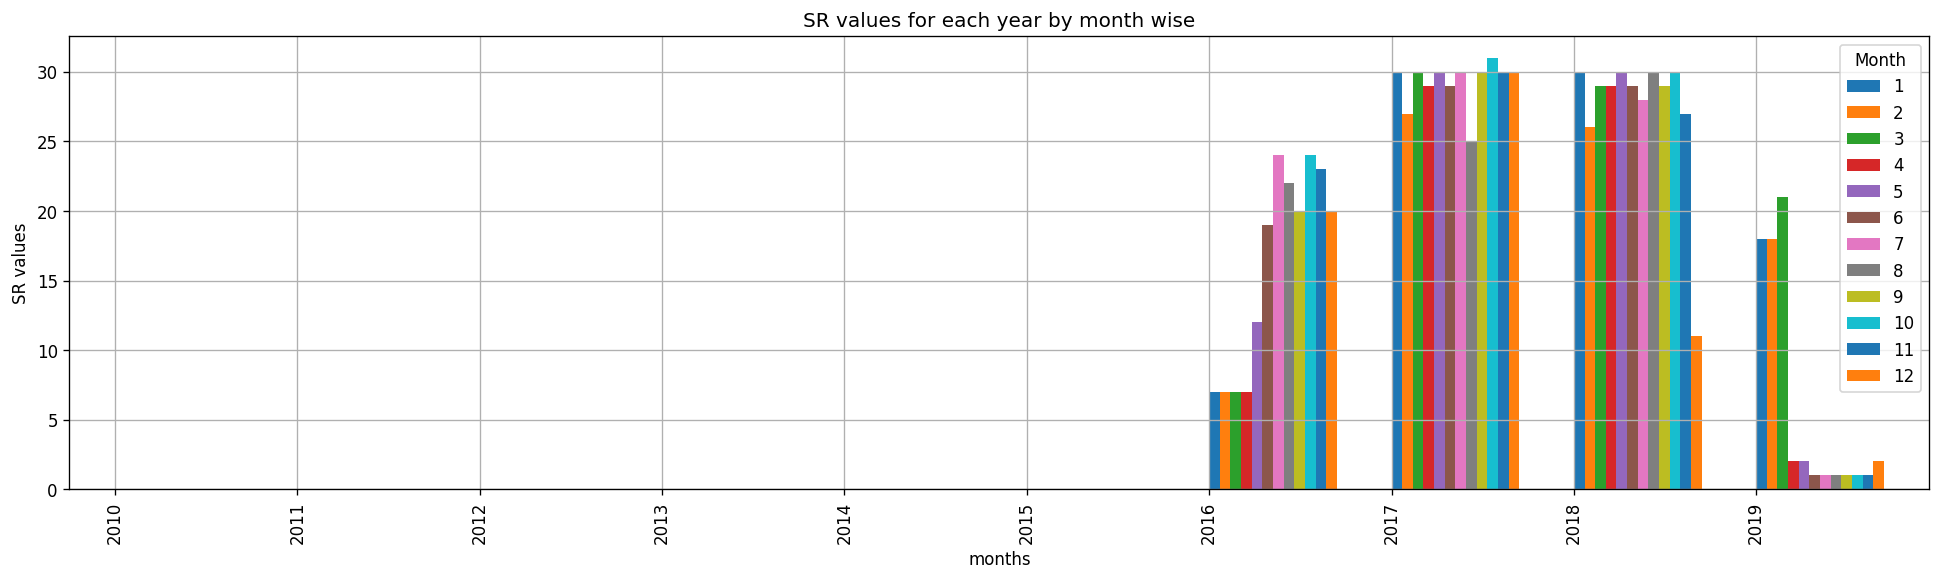

In [0]:
ax=d['Solar Radiation(SR)'].unstack().plot.bar(figsize=(20,5),align='edge', width=0.7)
ax.grid(zorder=0)
ax.set(xlabel='months', ylabel='SR values',title='SR values for each year by month wise')

[Text(0, 0.5, 'SO2 values'),
 Text(0.5, 0, 'months'),
 Text(0.5, 1.0, 'SO2 values for each year by month wise')]

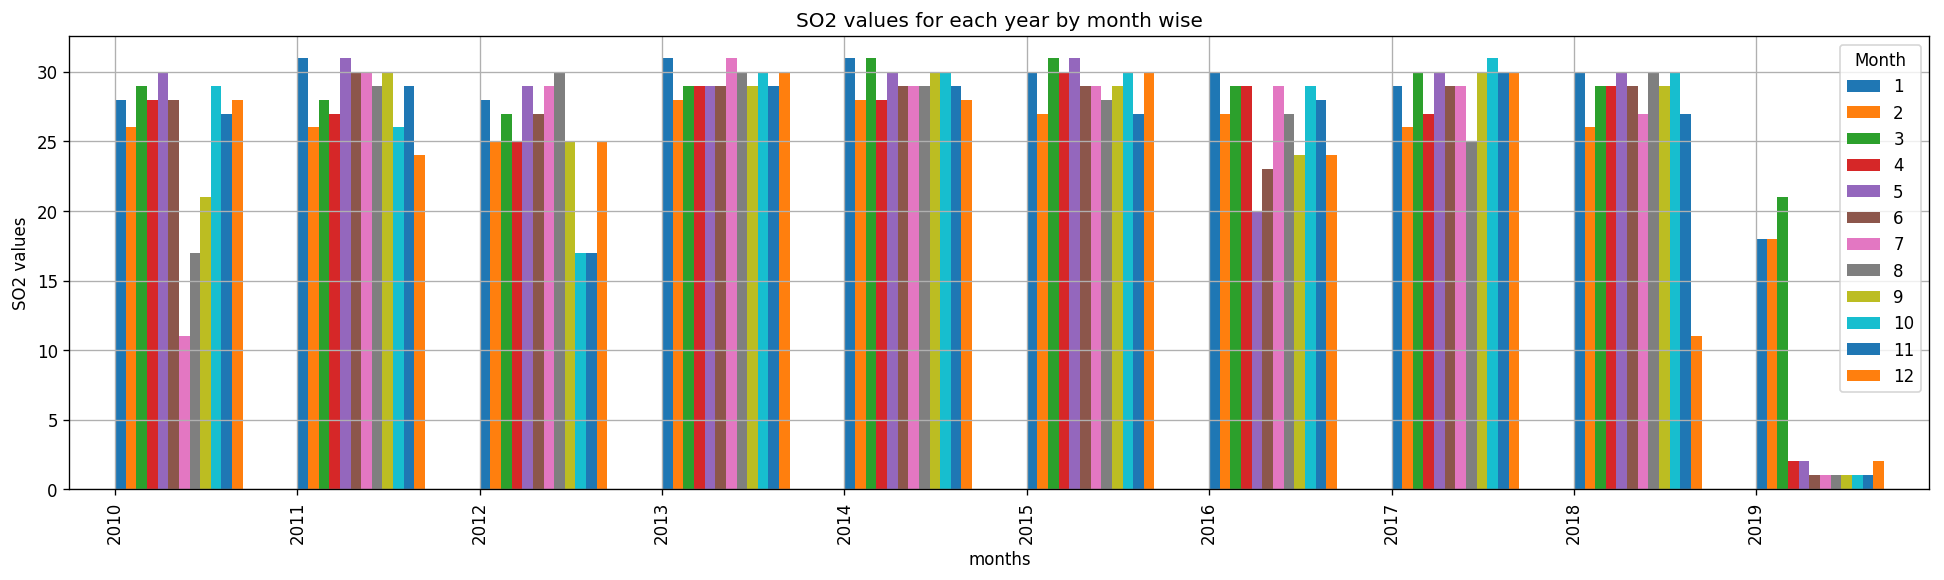

In [0]:
ax=d['Sulfur Dioxide(SO2)'].unstack().plot.bar(figsize=(20,5),align='edge', width=0.7)
ax.grid(zorder=0)
ax.set(xlabel='months', ylabel='SO2 values',title='SO2 values for each year by month wise')

[Text(0, 0.5, 'Temp values'),
 Text(0.5, 0, 'months'),
 Text(0.5, 1.0, 'Temp values for each year by month wise')]

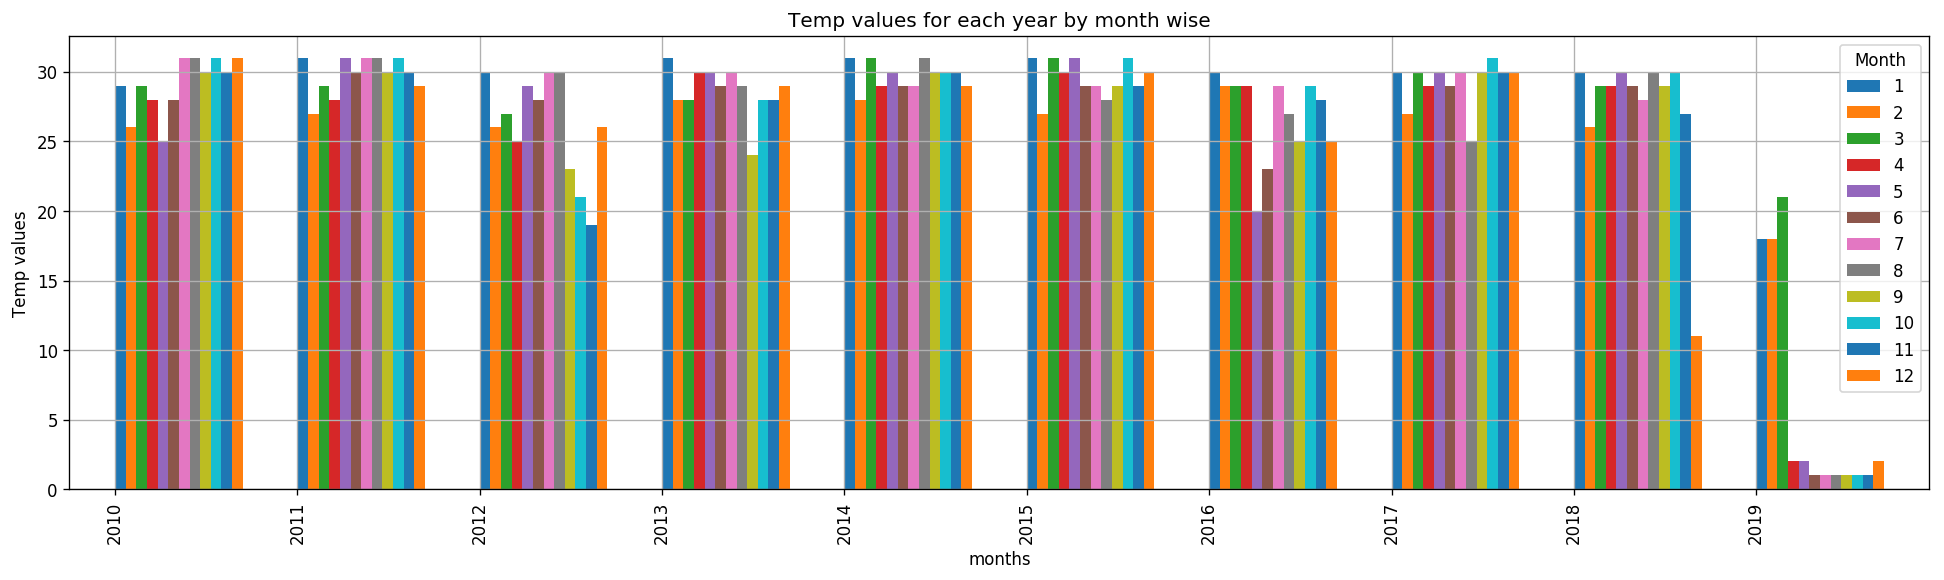

In [0]:
ax=d['Temperature(TEMP)'].unstack().plot.bar(figsize=(20,5),align='edge', width=0.7)
ax.grid(zorder=0)
ax.set(xlabel='months', ylabel='Temp values',title='Temp values for each year by month wise')

In [0]:
def colour_cell(val):
    if val*100/365 < 50:
      color = '#FF6347' 
    elif val*100/365 < 85:
      color = 'yellow'
    else:
      color = '#00FF00'  
    return 'Background-color: %s' % color

**Table showing available data for each year**

In [0]:
#d.groupby(['Year','Month'])[['Bar Pressure(Bar Pressure)']].sum()
d.groupby('Year').sum().style.applymap(colour_cell)

,Bar Pressure(BP),Nitrogen Dioxide(NO2),PM 10(RSPM),PM 2.5(PM2.5),Solar Radiation(SR),Sulfur Dioxide(SO2),Temperature(TEMP)
Year,,,,,,,
2010,355,357,354,0,0,302,349
2011,358,333,347,0,0,341,358
2012,317,148,311,0,0,304,314
2013,344,321,354,0,0,354,344
2014,358,354,339,0,0,352,357
2015,355,326,80,248,0,351,355
2016,0,321,0,318,192,319,323
2017,0,349,0,326,351,346,351
2018,0,328,0,328,328,327,328


**Observations:**
- By looking at the graphs and statistics we will take NO2 and SO2 concentration from period 2013 to 2017 as number of missing data values are less.

## SO2 concentration in Dwarka

In [0]:
df.head()

,Bar Pressure(BP),Nitrogen Dioxide(NO2),PM 10(RSPM),PM 2.5(PM2.5),Solar Radiation(SR),Sulfur Dioxide(SO2),Temperature(TEMP),Date
0,646.09,12.3,124.12,NaN,NaN,5.85,14.61,2010-01-02
1,732.95,27.28,70.62,NaN,NaN,5.05,23.87,2010-01-03
2,735.69,29.57,109.88,NaN,NaN,23.84,31.54,2010-01-04
3,734.58,15.93,61.12,NaN,NaN,6.36,30.12,2010-01-05
4,729.43,45.35,163.67,NaN,NaN,4.42,34.22,2010-01-06


In [0]:
data = df.copy()
data.index = pd.to_datetime(data.Date, format='%Y-%m-%d')
data.sort_index(inplace = True)
print(data.index)

DatetimeIndex(['2010-01-02', '2010-01-03', '2010-01-04', '2010-01-05',
               '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-09',
               '2010-01-10', '2010-01-11',
               ...
               '2019-05-02', '2019-05-04', '2019-06-02', '2019-07-02',
               '2019-08-02', '2019-09-02', '2019-10-02', '2019-11-02',
               '2019-12-02', '2019-12-03'],
              dtype='datetime64[ns]', name='Date', length=3179, freq=None)


In [0]:
data.drop(['Date'],axis=1,inplace=True)

In [0]:
data = data.convert_objects(convert_numeric=True)

In [0]:
data = data.interpolate(method='linear', axis=0).ffill().bfill()

In [0]:
import seaborn as sns
import matplotlib as mpl
'''def myFormatter(x, pos):
  return pd.to_datetime(x).strftime('%d/%m/%Y')
plt.figure(figsize=(15,5))
ax=sns.tsplot(data['Sulfur Dioxide(SO2)'].values,time = data.index)
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(myFormatter))
ax.set(xlabel='Year', ylabel='SO2 values',title='SO2 Concentration')'''

"def myFormatter(x, pos):\n  return pd.to_datetime(x).strftime('%d/%m/%Y')\nplt.figure(figsize=(15,5))\nax=sns.tsplot(data['Sulfur Dioxide(SO2)'].values,time = data.index)\nax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(myFormatter))\nax.set(xlabel='Year', ylabel='SO2 values',title='SO2 Concentration')"

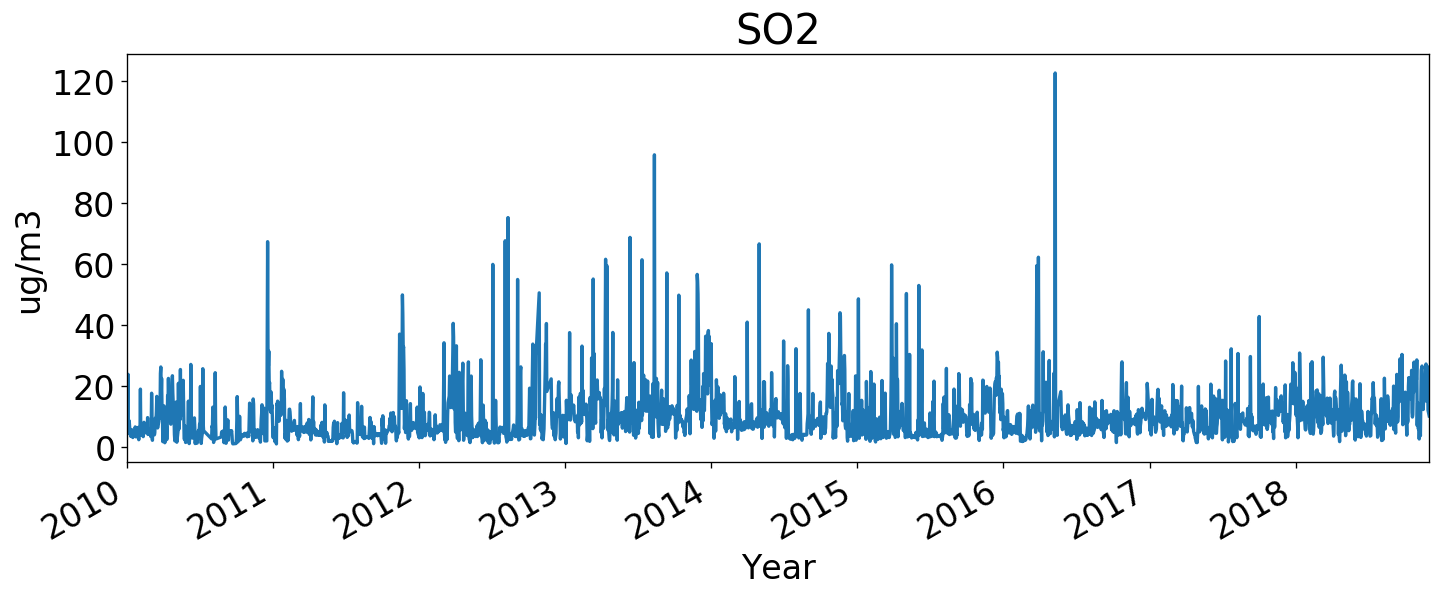

In [0]:
import matplotlib.pyplot as plt 
data1 = data['Sulfur Dioxide(SO2)'].truncate(before = '2013-01-01')
data1 = data['Sulfur Dioxide(SO2)'].truncate(after = '2018-12-01')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
#data1.plot(figsize=(16,5)) 
data1.plot(figsize=(14,5), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.title("SO2",fontsize=25)
plt.ylabel("ug/m3",fontsize=20)
plt.show()

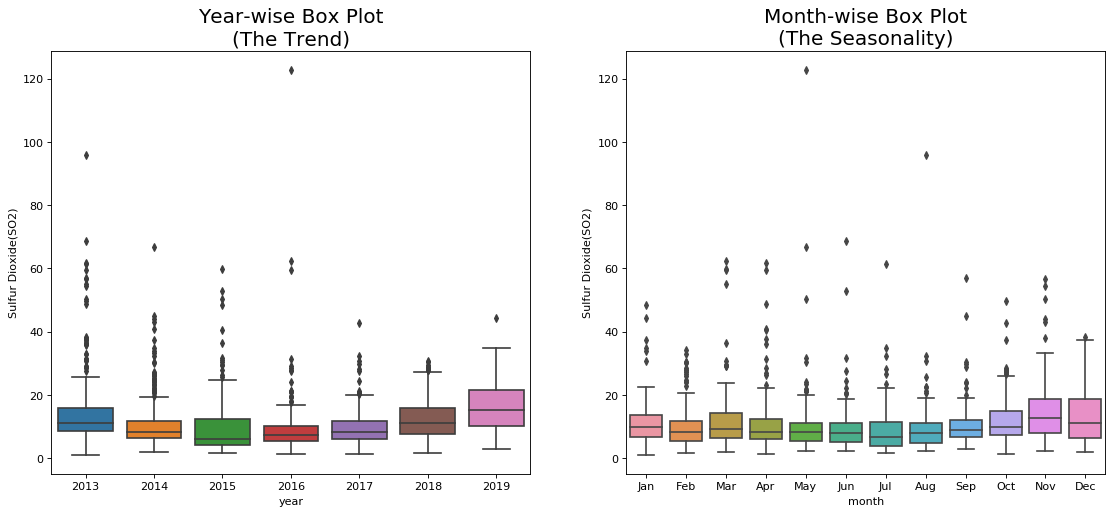

In [0]:
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
# Import Data
df = data.truncate(before = '2013-01-01').copy()
#df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(17,7), dpi= 80)
sns.boxplot(x='year', y='Sulfur Dioxide(SO2)', data=df, ax=axes[0])
sns.boxplot(x='month', y='Sulfur Dioxide(SO2)', data=df.loc[:, :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

- We can see there is low trend which we can ignore. 
- The months of  November and December clearly has higher SO2 concentration, which can be attributed to the festive season.

Text(0, 0.5, 'SO2 Concentration')

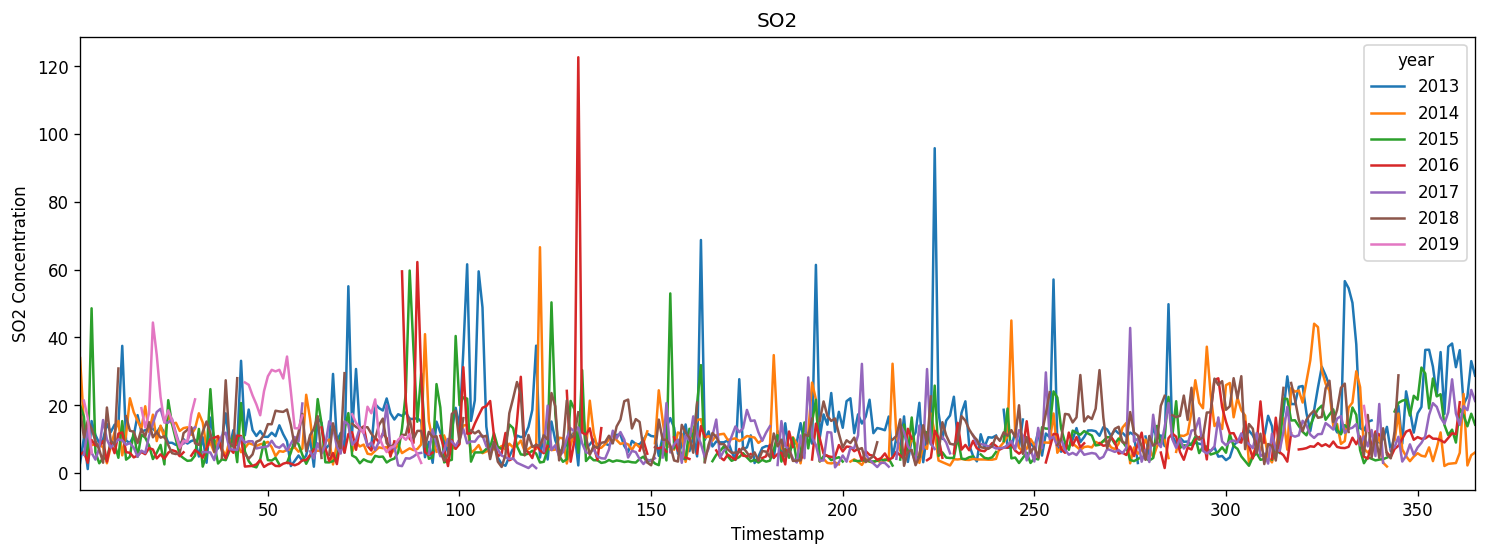

In [0]:
data_so2 = data.copy()
data_so2=data_so2[['Sulfur Dioxide(SO2)']].truncate(before = '2013-01-01')
data_so2['year'] = data_so2.index.year
data_so2['doy'] = data_so2.index.dayofyear
piv = pd.pivot_table(data_so2,values=['Sulfur Dioxide(SO2)'], index = ['doy'], columns = ['year'])
piv['Sulfur Dioxide(SO2)'].plot(figsize=(15,5),title='SO2')
plt.xlabel('Timestamp')
plt.ylabel('SO2 Concentration')

### Check if a data set or time series is random by Lag Plot 
A lag plot checks whether a data set or time series is random or not. Random data should not exhibit any identifiable structure in the lag plot. Non-random structure in the lag plot indicates that the underlying data are not random.
It is normally used to check for autocorrelation.

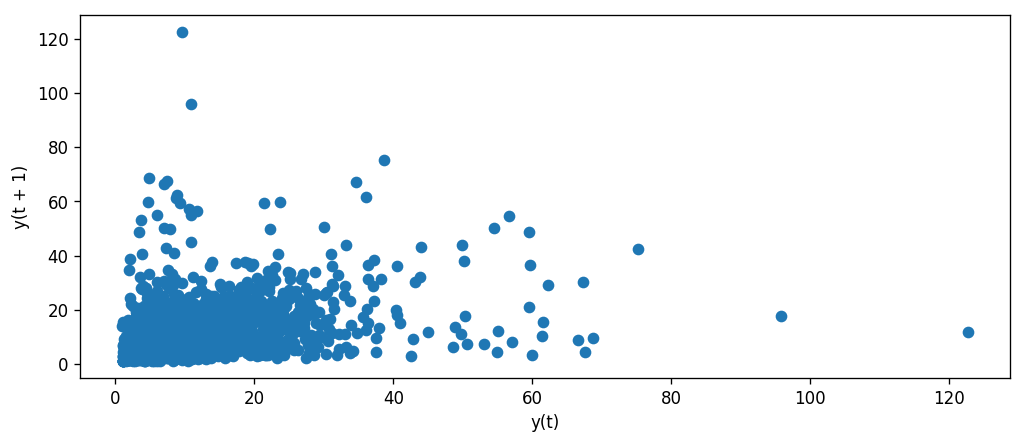

In [0]:
#https://www.itl.nist.gov/div898/handbook/eda/section3/lagplot.htm
from pandas.plotting import lag_plot
lag_plot(data1)
plt.show()

We can see it's less autocorrelated as points get wide and scattered with increasing lags.

Using box plot we can see the outliers.

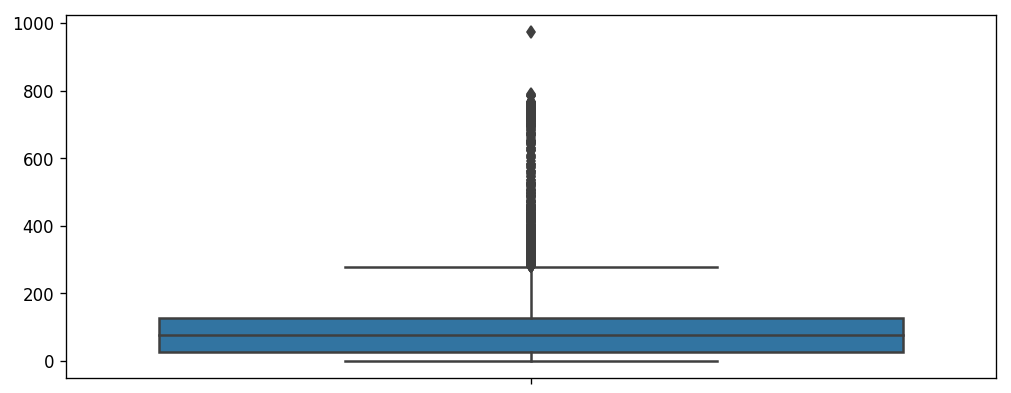

In [0]:
# library & dataset
import seaborn as sns
# Make boxplot for one group only
sns.boxplot( y=data.values )
#sns.plt.show()


**Are the data random?** \
No

**Is there serial correlation in the data?** \
No

**Are their outliers in the data?** \
Yes

### Checking randomness in time series using auto-correlation plot of Pandas

Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band.

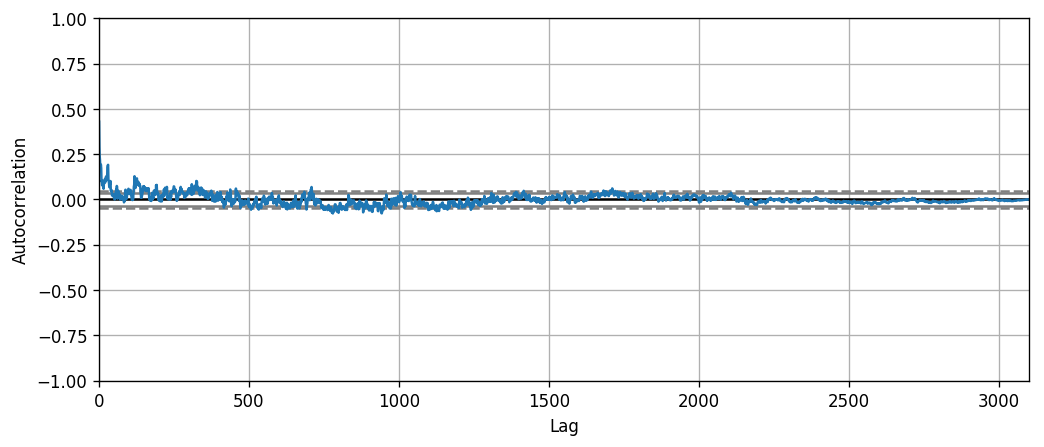

In [0]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data1)

It resembles to sine waves so it indicates that a value strongly correlates with another data point in the future, hence there is seasonality in the dataset.
And also the data is not random as it gives non zero values for most of the lags.




### Checking Stationality by Summary Statistics


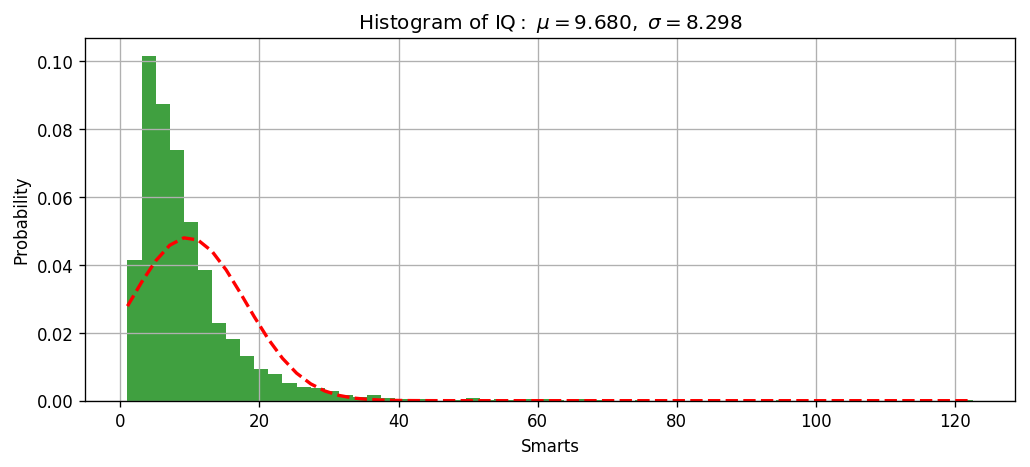

In [0]:
#https://stackoverflow.com/questions/7805552/fitting-a-histogram-with-python
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
'''# Plot histogram
data1.hist()
plt.show()'''

# best fit of data
(mu, sigma) = norm.fit(data1)

# the histogram of the data
n, bins, patches = plt.hist(data1, 60, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

**Common Probability Distribution**
![alt text](http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png)

By looking at the above distribution, our data resembles to log normal distribution.

Now split the time series data into two parts and compare the mean variance of each group if they differ and the difference is statistically significant, the time series is likely non-stationary.

In [0]:
X = data1.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%.2f, mean2=%.2f' % (mean1, mean2))
print('variance1=%.2f, variance2=%.2f' % (var1, var2))

mean1=9.34, mean2=10.02
variance1=81.28, variance2=56.19


Mean and Variance of each group differ. Hence it may not be stationary.
Let's take log of the above data since it resembles to the log normal distribution and plot its distribution curve.

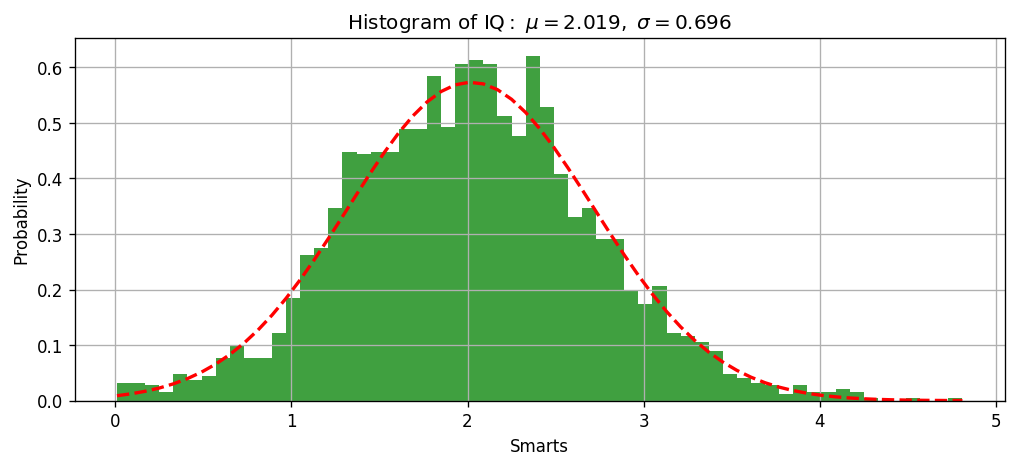

In [0]:
X = data1.values
X = np.log(X)
#plt.hist(X)
#plt.title('Distribution after taking log')

# best fit of data
(mu, sigma) = norm.fit(X)

# the histogram of the data
n, bins, patches = plt.hist(X, 60, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

The distribution looks like a gaussian distribution. So the data is stationary having some stationary component.

### Checking Stationarity by Plotting Rolling Statistics


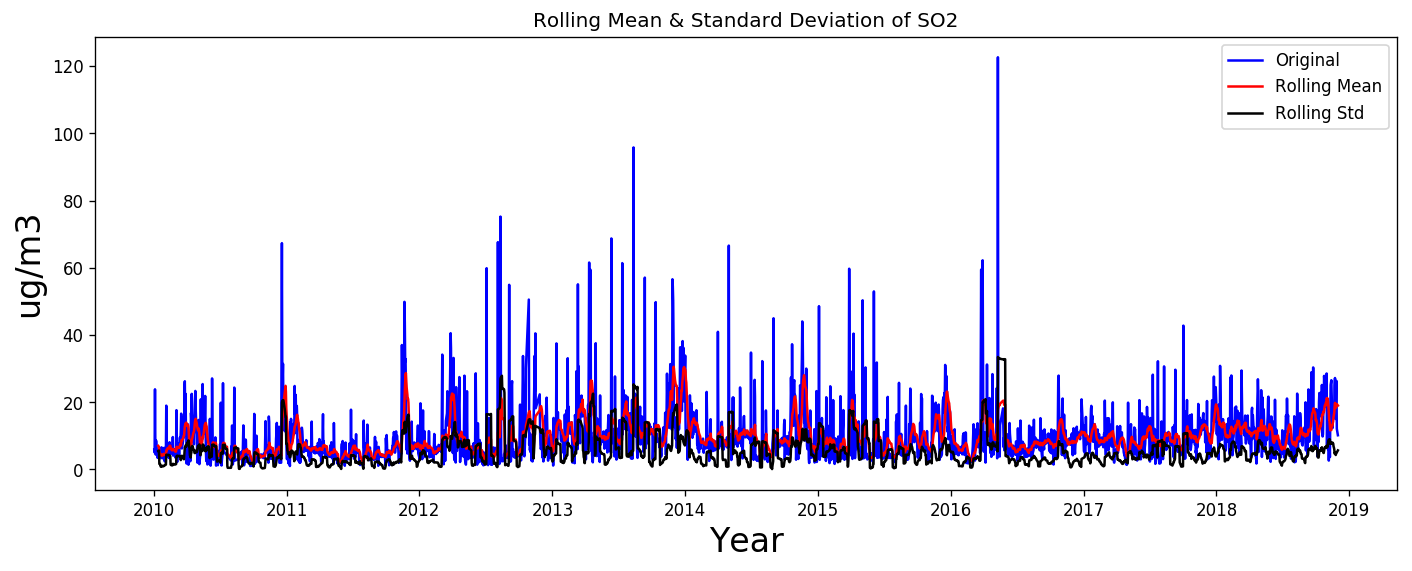

Results of Dickey-Fuller Test:
Test Statistic                   -5.443141
p-value                           0.000003
#Lags Used                       29.000000
Number of Observations Used    3070.000000
Critical Value (1%)              -3.432482
Critical Value (5%)              -2.862482
Critical Value (10%)             -2.567271
dtype: float64


In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    plt.figure(figsize=(14,5))
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation of SO2')
    plt.xlabel('Year', fontsize=20);
    plt.ylabel("ug/m3",fontsize=20)
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(data1)

Mean and variance are changing so not a stationary time series. There is seasonality present by looking at the graph.

### Checking Stationarity by Augmented Dickey-Fuller test
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

**Null Hypothesis (H0):** If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.  \
**Alternate Hypothesis (H1):** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure. We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non-stationary).

**p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary. \
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.** 

For example, if p-value = 0.2924, it means that null hypothesis will be rejected only around 30% which is quite a high considering the traditional level of significance (1%, 5%, and 10%).

In [0]:
# https://machinelearningmastery.com/time-series-data-stationary-python/
from statsmodels.tsa.stattools import adfuller
X = data1.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.443141
p-value: 0.000003
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


 test statistic value of -5.443141. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -5.443141 is less than the value of -3.432at 1%.

This suggests that **we can reject the null hypothesis with a significance level of less than 1%** (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

### Why do we make the time series stationary?
Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

## ESTIMATING THE TREND
``

### Using rolling average
There are several ways to think about identifying trends in time series. One popular way is by taking a [Rolling average](https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial), which means that, for each time point, you take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose.

What happens then because you take the average is it tends to smooth out noise and seasonality. 

When it comes to determining the window size, here, it makes sense to first try out one of twelve months, as you're talking about yearly seasonality.


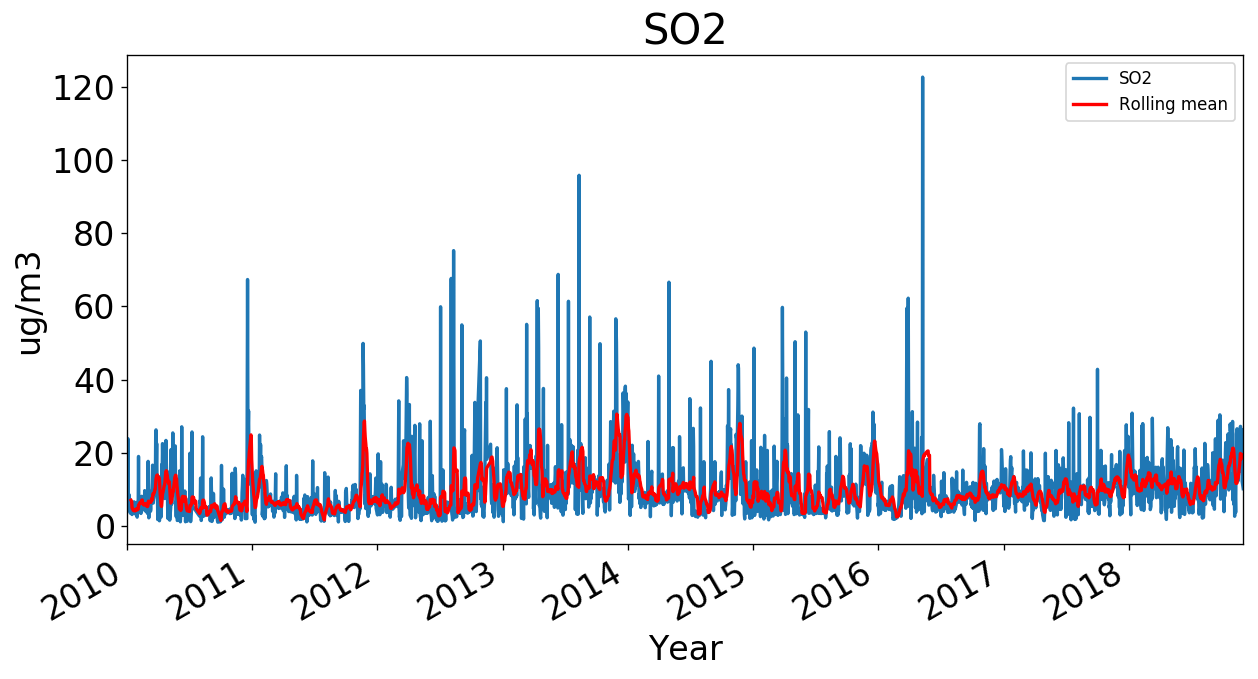

In [0]:
fig = plt.figure(figsize=(12,6))
data1.plot(linewidth=2, fontsize=20,label='SO2')
data1.rolling(12).mean().plot(linewidth=2, fontsize=20, color='r',label='Rolling mean')
plt.title("SO2",fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel("ug/m3",fontsize=20)
plt.legend()
plt.show()

Now you have the trend that you're looking for! You have removed most of the seasonality compared to the previous plot.
But there can still be the seasonality left because the graph shows repeatitive patterns.


### Using Regression method

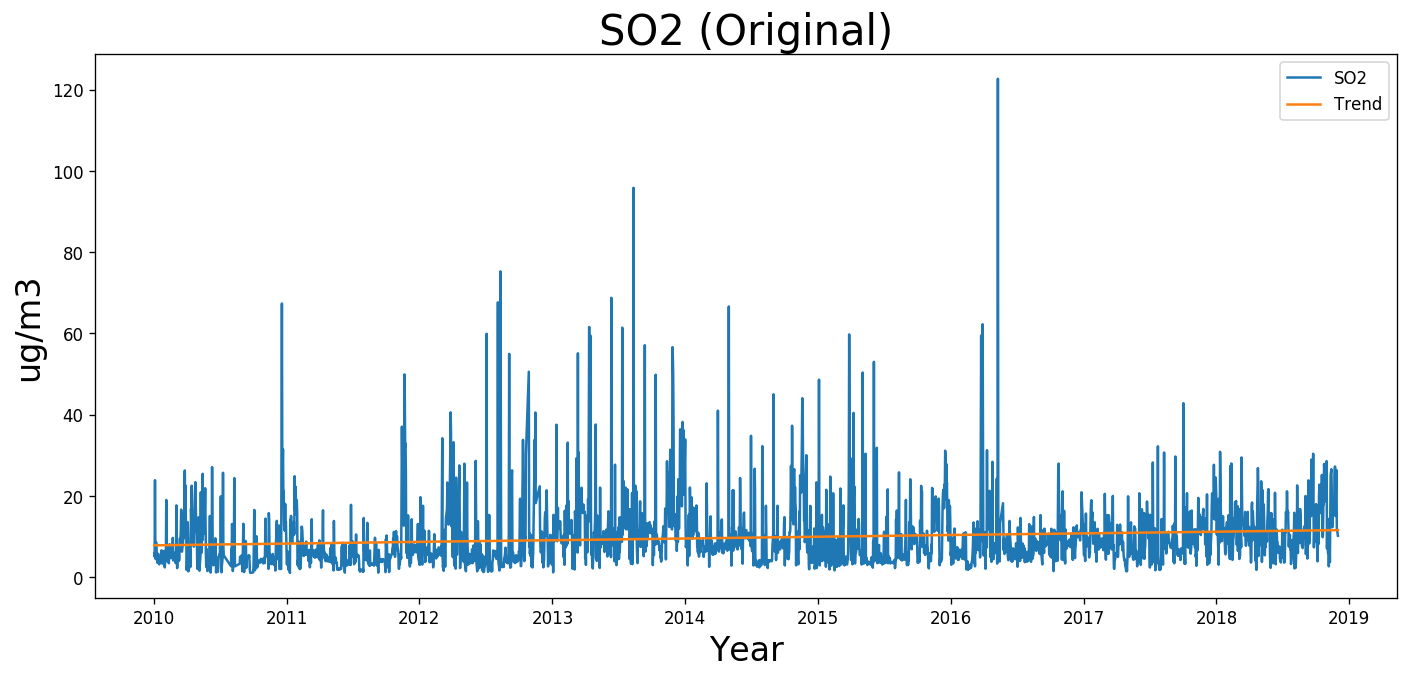

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,6))
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = [i for i in range(0, len(data1))]
X = np.reshape(X, (len(X), 1))
y = data1
model.fit(X, y)
trend = model.predict(X)
trend = pd.DataFrame(trend)
trend.index = data1.index
# plot trend
plt.plot(y,label='SO2')
plt.plot(trend,label='Trend')
plt.xlabel('Year', fontsize=20);
plt.title("SO2 (Original)",fontsize=25)
plt.ylabel("ug/m3",fontsize=20)
plt.legend()
plt.show()

It shows downward trend.

## ELIMINATING THE TREND

### Transformation

We can use transformation such as log, square root, cube root etc to reduce the trend.

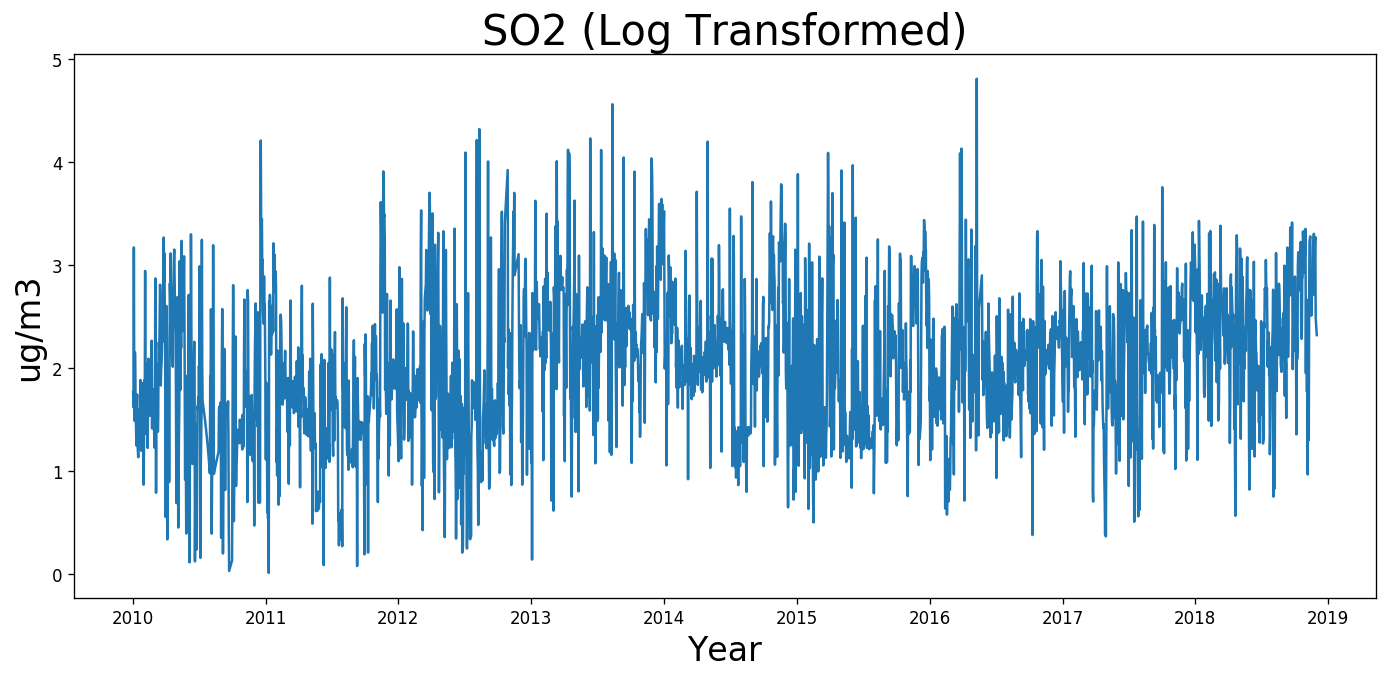

In [0]:
plt.figure(figsize=(14,6))
ts_log = np.log(data1)
plt.plot(ts_log)
plt.xlabel('Year', fontsize=20);
plt.title("SO2 (Log Transformed)",fontsize=25)
plt.ylabel("ug/m3",fontsize=20)
plt.show()

No Trend can be seen after applying log transformation. Before applying log we saw there is high seasonality hence we will focus more on seasonality.

## ELIMINATING SEASONALITY

### Differencing

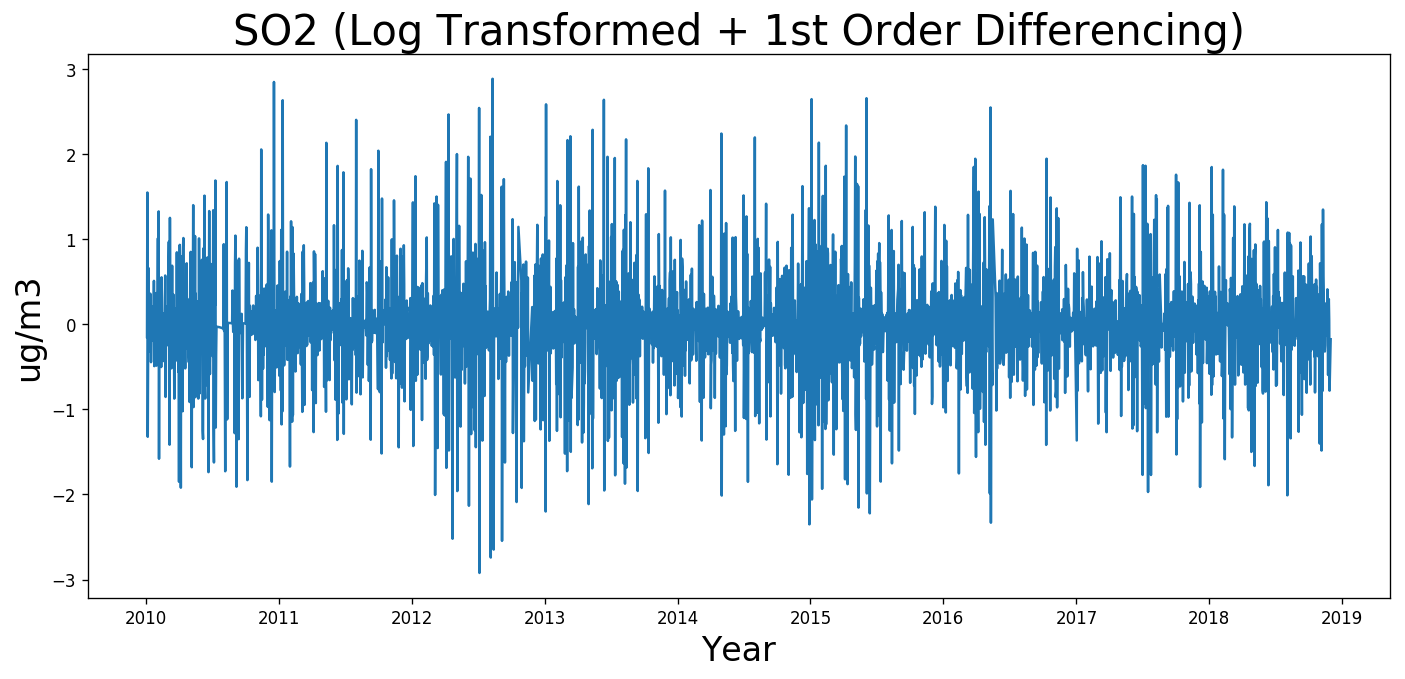

In [0]:
plt.figure(figsize=(14,6))
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.xlabel('Year', fontsize=20);
plt.title("SO2 (Log Transformed + 1st Order Differencing)",fontsize=25)
plt.ylabel("ug/m3",fontsize=20)
plt.show()

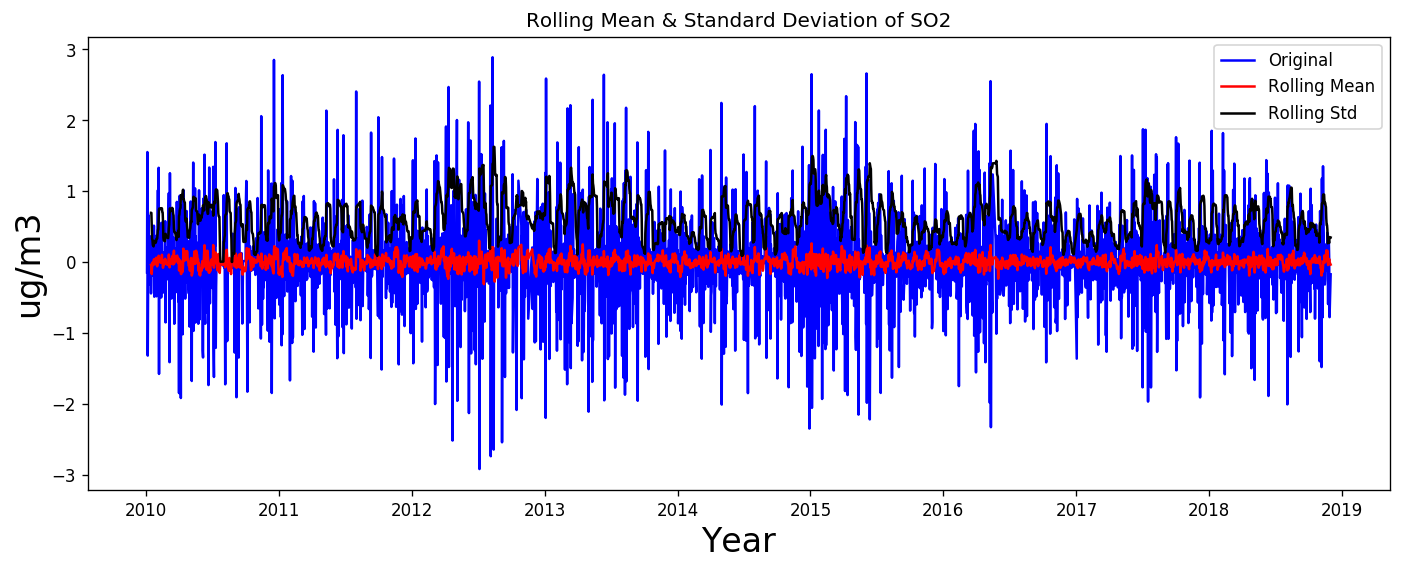

Results of Dickey-Fuller Test:
Test Statistic                  -19.437741
p-value                           0.000000
#Lags Used                       29.000000
Number of Observations Used    3069.000000
Critical Value (1%)              -3.432483
Critical Value (5%)              -2.862482
Critical Value (10%)             -2.567272
dtype: float64


In [0]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Next we will decompose data into residual, trend

### Decomposition

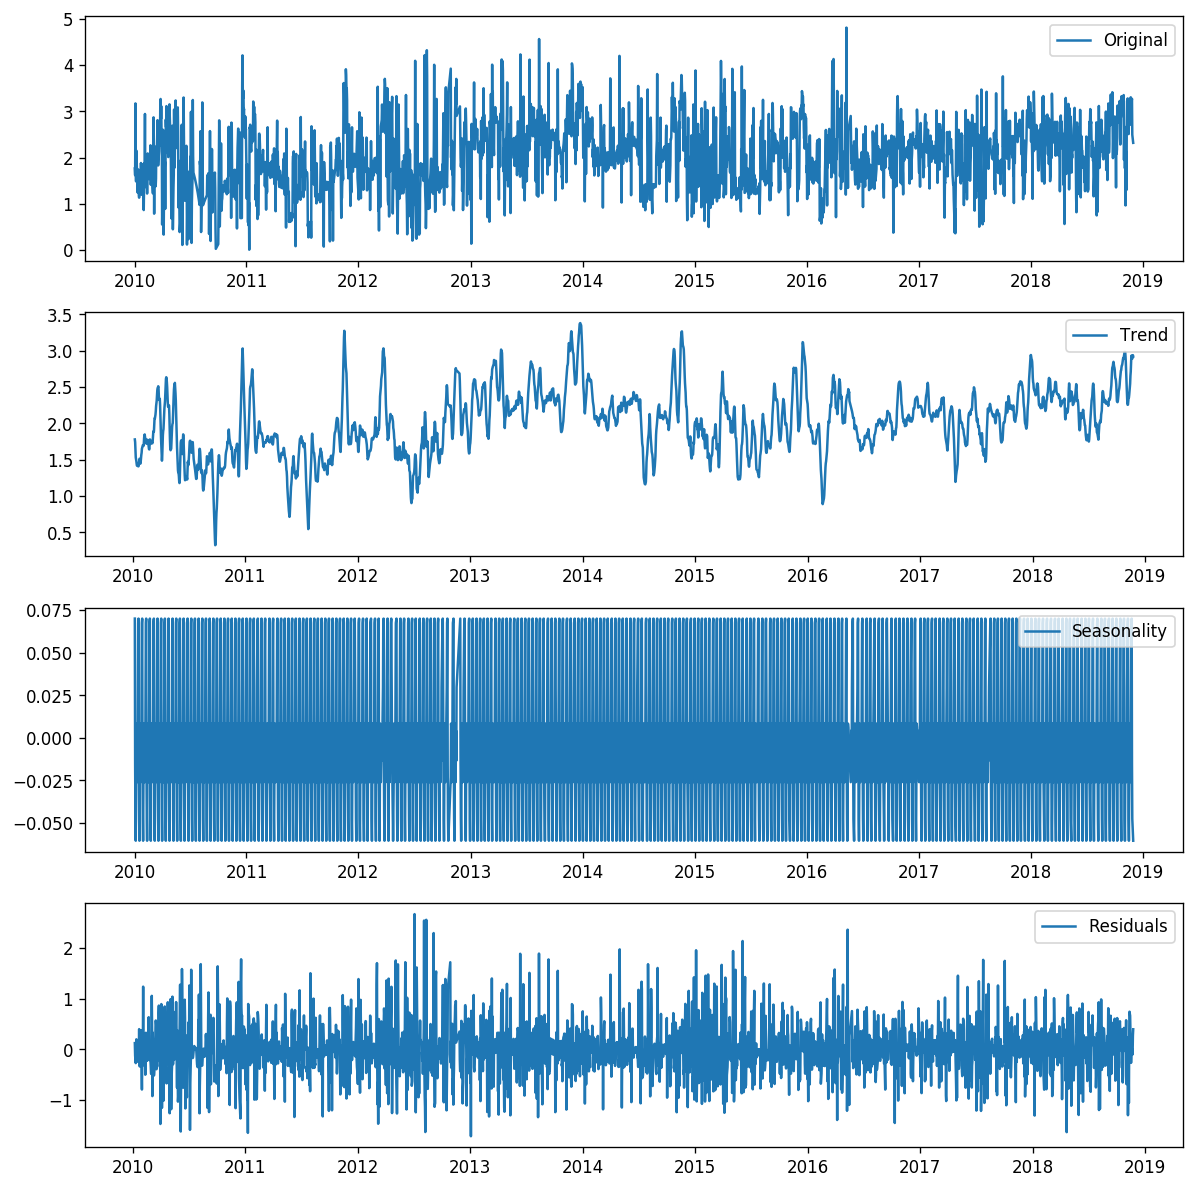

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(10,10))
decomposition = seasonal_decompose(ts_log,freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Stationary and Non-Stationary Time Series
![time_series](https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-1024x674.png)
Source: [R’s TSTutorial](https://cran.r-project.org/web/packages/TSTutorial/vignettes/Stationary.pdf)

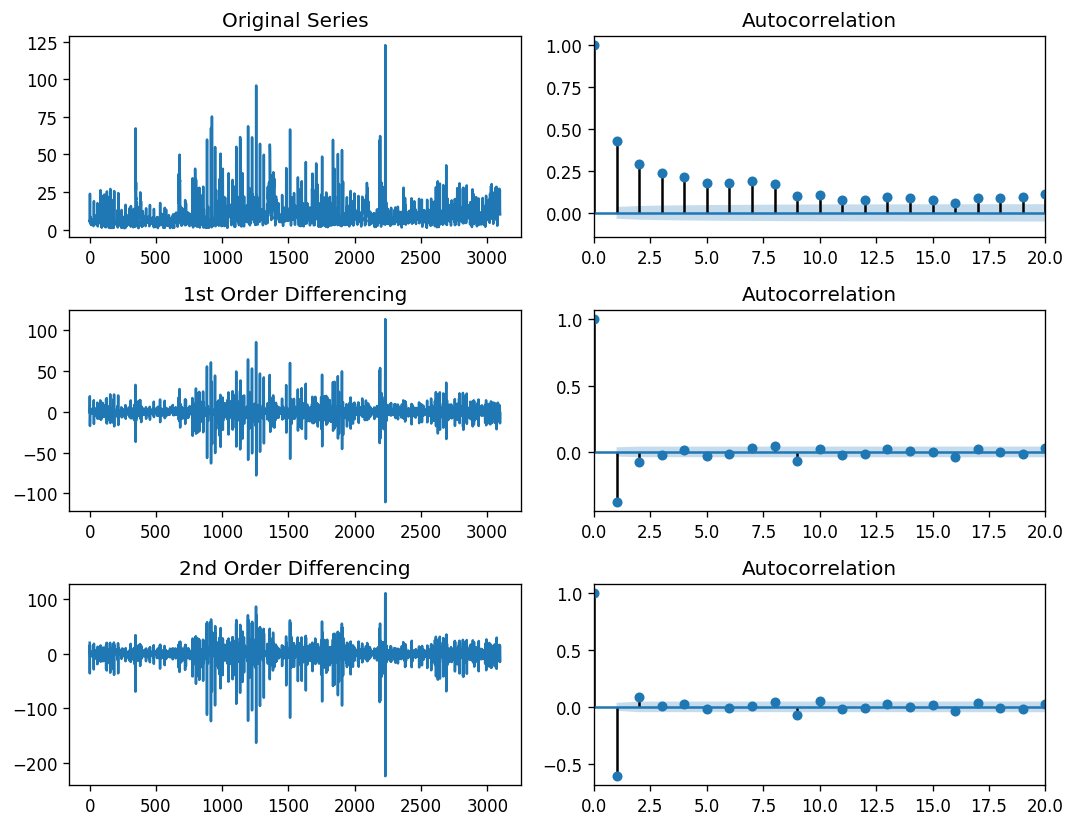

In [0]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = data1
# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df.values); axes[0, 0].set_title('Original Series')
plot_acf(df.values, ax=axes[0, 1])
axes[0, 1].set_xlim([0,20])

# 1st Differencing
axes[1, 0].plot(np.diff(df.values)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(df.values), ax=axes[1, 1])
axes[1, 1].set_xlim([0,20])

# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(df.values))); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(np.diff(df.values)), ax=axes[2, 1])
axes[2, 1].set_xlim([0,20])
fig.tight_layout()
plt.show()

We will take 1st order differencing as increasing the order can lead to overdifferencing

## ARIMA(p,d,q)

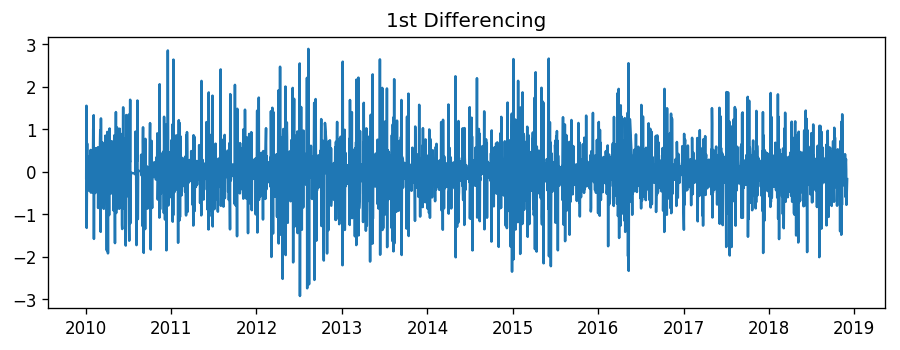

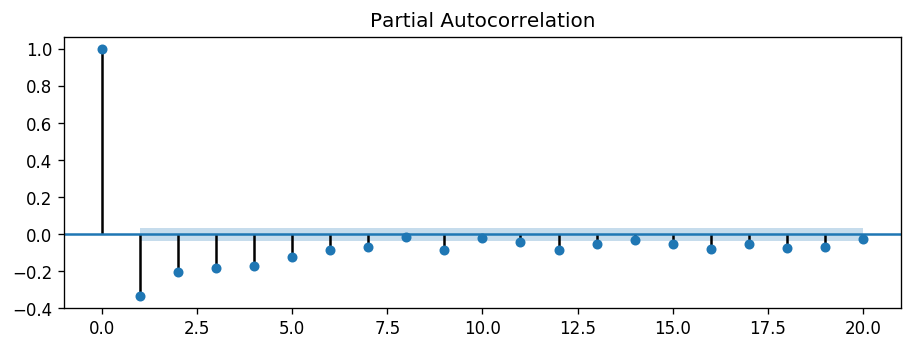

In [0]:
# PACF plot of 1st differenced series
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

plt.plot(ts_log.diff()) 
plt.title('1st Differencing')

plot_pacf(ts_log.diff().dropna(),lags=20)
plt.title
plt.show()

By using Partial Autocorrelation Graph, We can take p value as 1

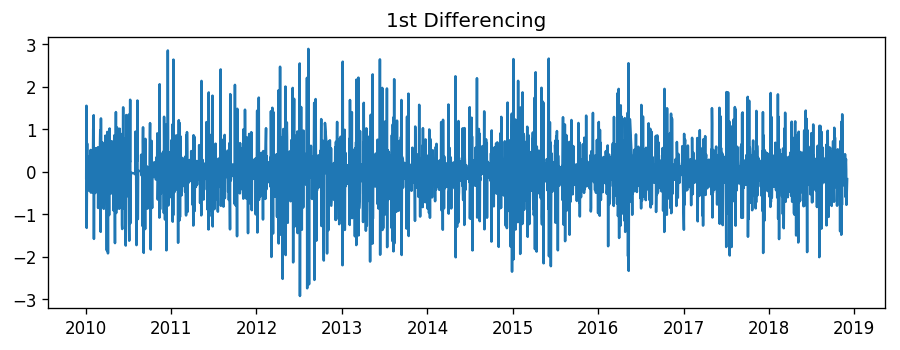

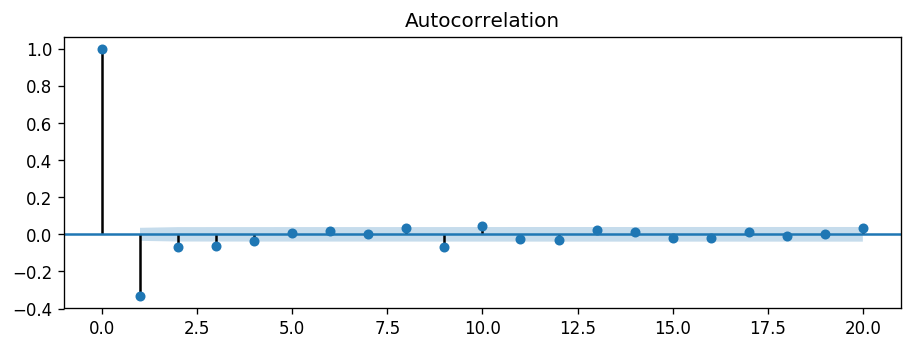

In [0]:
# PACF plot of 1st differenced series
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

plt.plot(ts_log.diff()) 
plt.title('1st Differencing')

plot_acf(ts_log.diff().dropna(),lags=20)
plt.title
plt.show()

By using Autocorrelation Graph, we can take q = 1

In [0]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(ts_log,order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                               ARIMA Model Results                               
Dep. Variable:     D.Sulfur Dioxide(SO2)   No. Observations:                 3099
Model:                    ARIMA(1, 1, 1)   Log Likelihood               -2569.272
Method:                          css-mle   S.D. of innovations              0.554
Date:                   Sat, 27 Apr 2019   AIC                           5146.544
Time:                           09:02:51   BIC                           5170.700
Sample:                                1   HQIC                          5155.219
                                                                                 
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0003      0.001      0.403      0.687      -0.001       0.002
ar.L1.D.Sulfur Dioxide(SO2)     0.4312      0.019     22

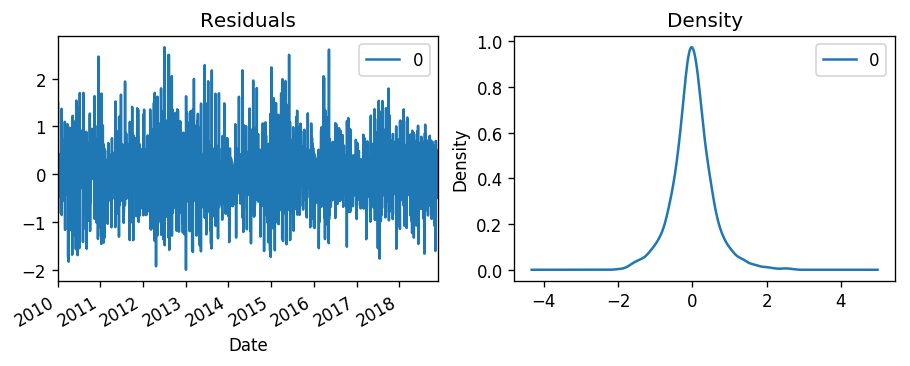

In [0]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [0]:
print(residuals.describe())

                 0
count  3099.000000
mean     -0.000302
std       0.554533
min      -2.000433
25%      -0.285896
50%      -0.011139
75%       0.267756
max       2.657653


We are plotting residual to see some trend information not captured by the model.
we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.


The results shows residual error values are gaussian and is centered on zero.

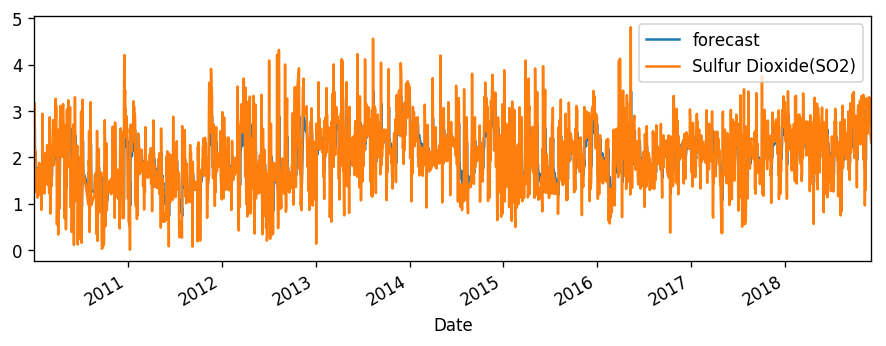

In [0]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [0]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df[:3000]
test = df[3000:]

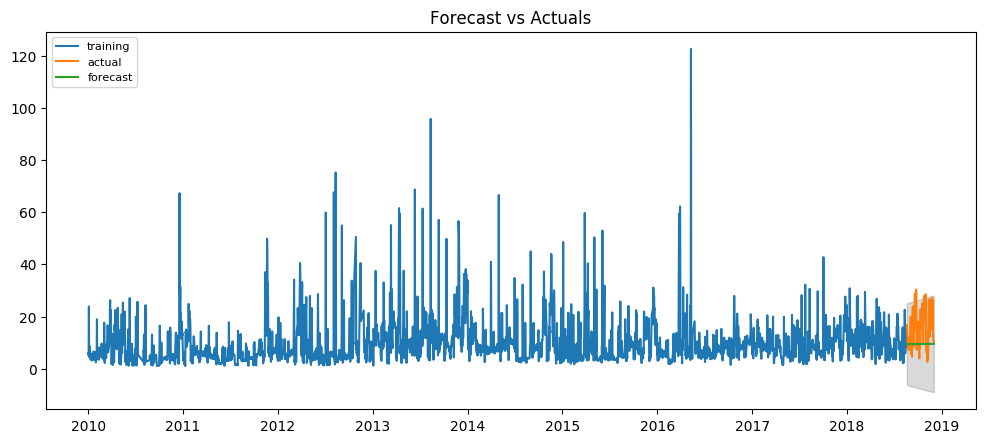

In [0]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The reason we are getting straight line as forecast is because there is lot of seasonal components so we will go for SARIMA which uses seasonal differencing.
Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, you subtract the value from previous season.

In [0]:
df1=df.copy
df=data1
dfseries = ts_log

In [0]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = dfseries[:3000]
test = dfseries[3000:]

In [0]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(dfseries,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4323      0.015     29.318      0.000       0.403       0.461
ma.L1         -0.9559      0.006   -161.708      0.000      -0.967      -0.944
ar.S.L6        0.0385      0.017      2.298      0.022       0.006       0.071
ma.S.L6       -1.0002      0.051    -19.484      0.000      -1.101      -0.900
sigma2         0.3063      0.017     17.935      0.000       0.273       0.340


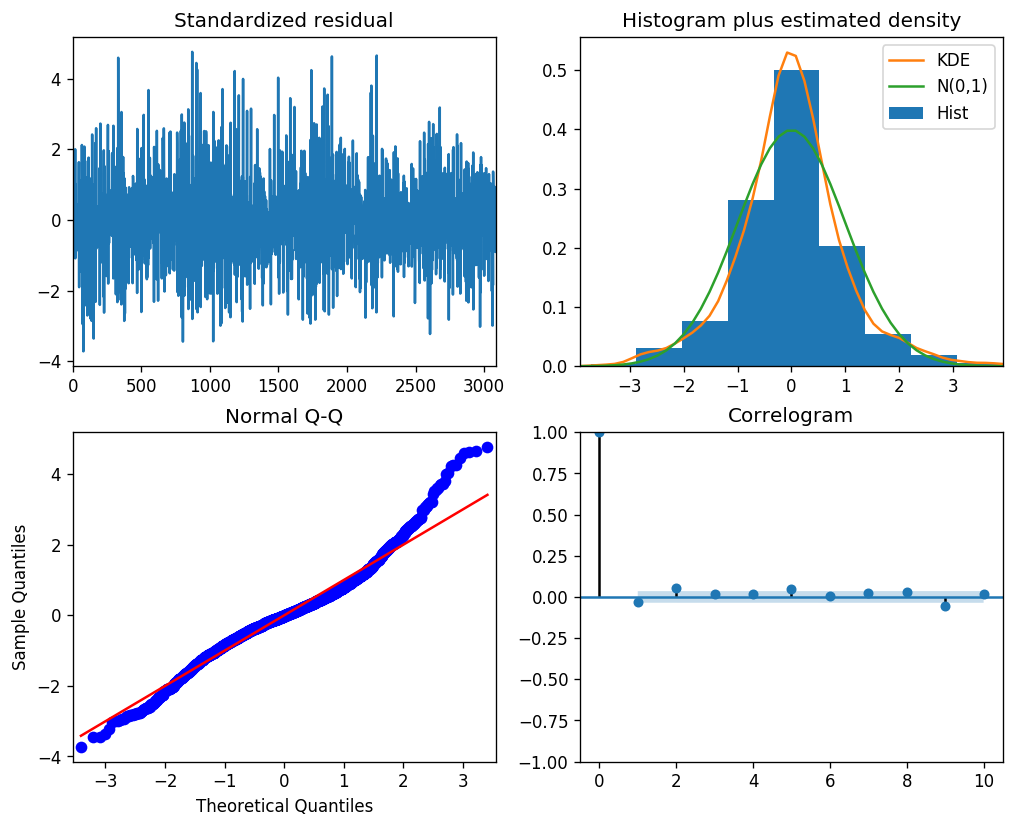

In [0]:
results.plot_diagnostics(figsize=(10, 8))
plt.show()

**how to interpret the plot diagnostics?**

**Top left:** The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

**Top Right:** The density plot suggest normal distribution with mean zero.

**Bottom left:** All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

**Bottom Right:** The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

In [0]:
pred = results.get_prediction(start=3000, dynamic=False)
pred_ci = pred.conf_int()

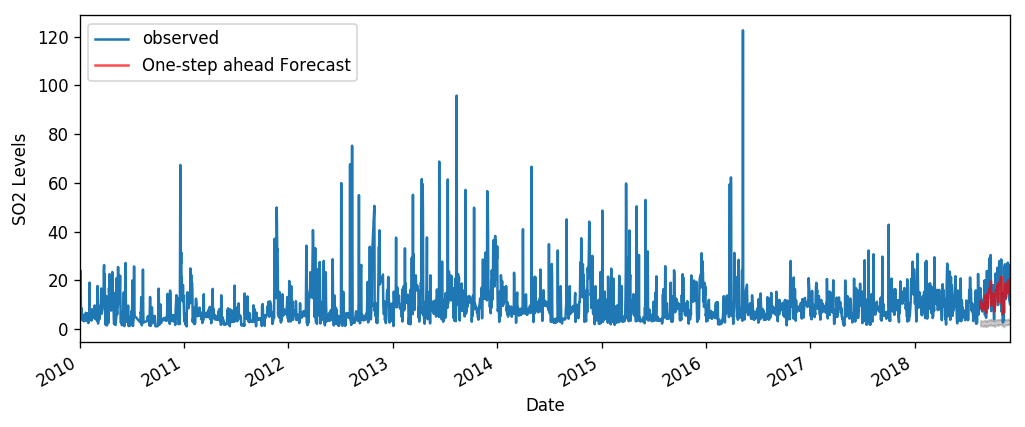

In [0]:
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':120})
ax = np.exp(dfseries).plot(label='observed')
np.exp(pred.predicted_mean).plot(ax=ax, label='One-step ahead Forecast', alpha=.7,color='r')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('SO2 Levels')
plt.legend()

plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = test

# Compute the mean square error
mse = ((np.exp(y_forecasted) - np.exp(y_truth)) ** 2).mean()
print('The Mean Squared Error of our forecasts (MSE) is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts (RMSE) is {}'.format(round(mse**0.5, 2)))

The Mean Squared Error of our forecasts (MSE) is 36.42
The Root Mean Squared Error of our forecasts (RMSE) is 6.03


In [0]:
df_err = pd.DataFrame(list(zip(np.exp(y_forecasted),np.exp(y_truth))), index=y_forecasted.index, columns =['Predicted','Actual']) 
df_err 

,Predicted,Actual
Date,,
2018-08-19,8.712283,16.75
2018-08-20,11.458510,15.44
2018-08-21,11.169078,12.83
2018-08-22,10.110420,11.03
2018-08-23,10.013742,9.77
2018-08-24,9.748626,7.61
2018-08-25,8.712044,7.38
2018-08-26,7.950748,7.12
2018-08-27,7.927625,7.94


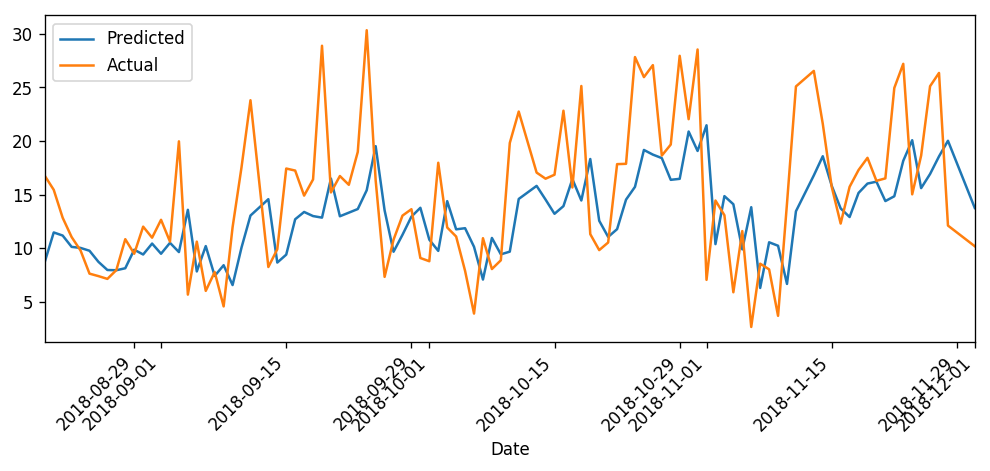

In [0]:
df_err.plot(rot=45)

**Conclusion:**

The Mean Squared Error of our forecasts (MSE) is 36.42

The Root Mean Squared Error of our forecasts (RMSE) is 6.03